# Zadanie 2.1
Wygenerować następujące sygnały dyskretne:

a) Impuls jednostkowy oraz impuls przesunięty o 40 próbek.

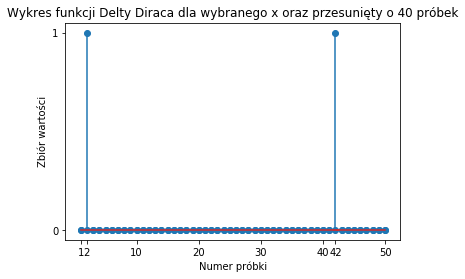

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
x=np.linspace(1,50,50)
y=signal.unit_impulse(50,1)
plt.title("Wykres funkcji Delty Diraca dla wybranego x oraz przesunięty o 40 próbek")
plt.xlabel("Numer próbki")
plt.ylabel("Zbiór wartości")
plt.stem(x,y)
plt.xticks((1,2,10,20,30,40,42,50))
plt.yticks((0,1))
y2=signal.unit_impulse(50,41)
plt.stem(x,y2)
plt.show()


b) Przebiegi periodyczne (po 5 okresów, łącznie 200 próbek): 

sinusoidalny, piłokształtny, prostokątny, użyć funkcji sin, sawtooth, square.


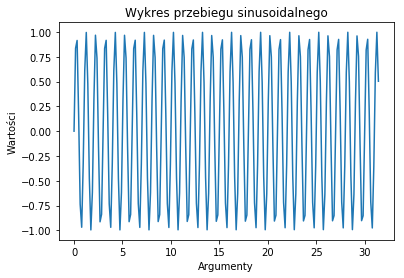

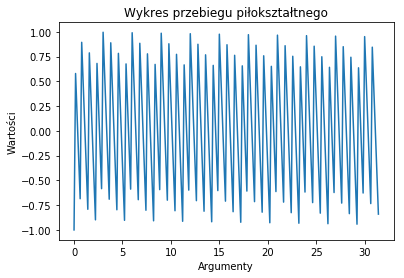

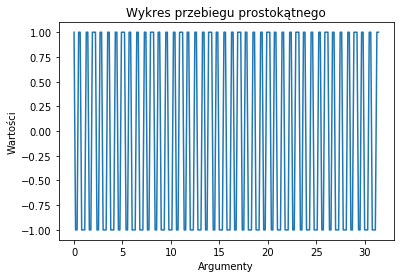

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
x=np.linspace(0,10*np.pi,200)
y=np.sin(2*np.pi*x)
z=signal.sawtooth(10*np.pi*x)
c=signal.square(10*np.pi*x)
plt.plot(x,y)
plt.title("Wykres przebiegu sinusoidalnego")
plt.xlabel("Argumenty")
plt.ylabel("Wartości")
plt.show()
plt.title("Wykres przebiegu piłokształtnego")
plt.xlabel("Argumenty")
plt.ylabel("Wartości")
plt.plot(x,z)
plt.show()
plt.title("Wykres przebiegu prostokątnego")
plt.xlabel("Argumenty")
plt.ylabel("Wartości")
plt.plot(x,c)
plt.show()

c) Szum gaussowski (200 próbek) dla parametrów: μ= 0 oraz σ$^2$ = 0.5.

Wygenerowane sygnały przedstawić na wykresach (w tym samym oknie),

użyć funkcji takich jak figure, plot, subplot, stem, axis, title, xlabel, ylabel, etc...

Odchylenie standardowe=0.7071067811865476
Wariancja=0.45958501318976064
Mean=-0.01948986594183658


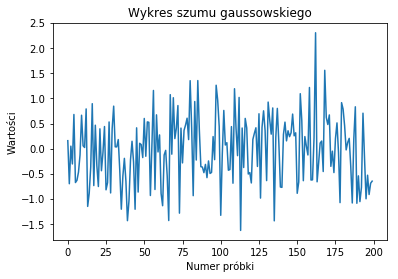

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
mi=0
delta=np.sqrt(0.5)
print("Odchylenie standardowe="+str(delta))
y=np.random.normal(mi,delta,200)
plt.figure()
plt.plot(y)
plt.title("Wykres szumu gaussowskiego")
plt.xlabel("Numer próbki")
plt.ylabel("Wartości")
print("Wariancja="+str(np.var(y)))
print("Mean="+str(np.mean(y)))
plt.show()

# Zadanie 2.2

Napisać funkcję generującą dyskretny sygnał sinusoidalny y[n] = $A$sin(2$\pi$ f n / f$_s$ + $\phi$)

z następującymi parametrami A – amplituda, f – częstotliwość, φ – przesunięcie fazowe, fs – tempo próbkowania. 

Wygenerować kilka, przykładowych przebiegów, sporządzić wykresy, przeprowadzić testy odsłuchowe

(przy użyciu funkcji sound). Jaki wpływ na wrażenia słuchowe mają amplituda, częstotliwość i faza?

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pyaudio

def SinusoidalSignal(time,frequency,amplitude,phase,sampling):
    duration = time   # in seconds, may be float
    f = frequency     # sine frequency, Hz, may be float
    A = amplitude     # amplitude
    fi = phase        # phase shift
    fs = sampling     # sampling rate
    # generate samples, note conversion to float32 array
    #+fi%*np.pi/180
    return A*(np.sin(2*np.pi*np.arange(fs*duration)*f/fs)+(fi*np.pi/180))


if __name__=="__main__":
    p = pyaudio.PyAudio()
    volume = 0.5     # range [0.0, 1.0]
    fs = 44100       # sampling rate, Hz, must be integer
    samples1 = SinusoidalSignal(3.0,444.0,50,0,fs).astype(np.float32)
    samples2 = SinusoidalSignal(3.0,444.0,50,180,fs).astype(np.float32)#zmienia sinusa na cosinusa
    samples3 = SinusoidalSignal(3.0,444.0,150,0,fs).astype(np.float32)#zmienia głośność
    samples4 = SinusoidalSignal(3.0,888.0,50,0,fs).astype(np.float32) #zmienia barwe
    
    # for paFloat32 sample values must be in range [-1.0, 1.0]
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs,output=True)
    # play. May repeat with different volume values (if done interactively)
    stream.write(volume*samples1)
    stream.stop_stream()
    stream.close()
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs,output=True)
    stream.write(volume*samples2)
    stream.stop_stream()
    stream.close()
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs,output=True)
    stream.write(volume*samples3)
    stream.stop_stream()
    stream.close()
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs,output=True)
    stream.write(volume*samples4)
    stream.stop_stream()
    stream.close()
    p.terminate()

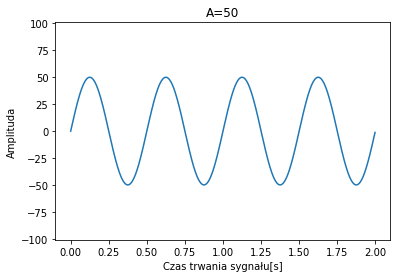

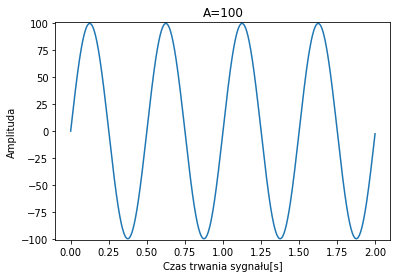

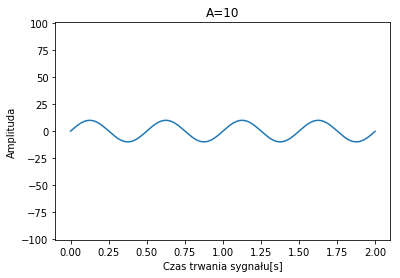

In [141]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pyaudio

def SinusoidalSignal(time,frequency,amplitude,phase,sampling):
    duration = time   # in seconds, may be float
    f = frequency     # sine frequency, Hz, may be float
    A = amplitude     # amplitude
    fi = phase        # phase shift
    fs = sampling     # sampling rate
    # generate samples, note conversion to float32 array
    #+fi%*np.pi/180
    return A*(np.sin(2*np.pi*np.arange(fs*duration)*f/fs)+(fi*np.pi/180))
if __name__=="__main__":
    #wykres pierwszej funkcji
    fs = 500
    y1=SinusoidalSignal(2.0,2.0,50,0,fs)
    t1=np.arange(0,2.0,1/fs)
    plt.title("A=50")
    plt.plot(t1,y1)
    plt.ylabel("Amplituda")
    plt.ylim(-101,101)
    plt.xlabel("Czas trwania sygnału[s]")

    plt.show()
    y2=SinusoidalSignal(2.0,2.0,100,0,fs)
    plt.plot(t1,y2)
    plt.title("A=100")
    plt.ylabel("Amplituda")
    plt.xlabel("Czas trwania sygnału[s]")
    plt.ylim(-101,101)
    plt.show()
    y3=SinusoidalSignal(2.0,2.0,10,0,fs)
    plt.plot(t1,y3)
    plt.ylim(-101,101)
    plt.title("A=10")
    plt.ylabel("Amplituda")
    plt.xlabel("Czas trwania sygnału[s]")
    plt.show()

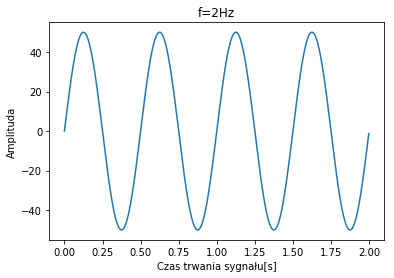

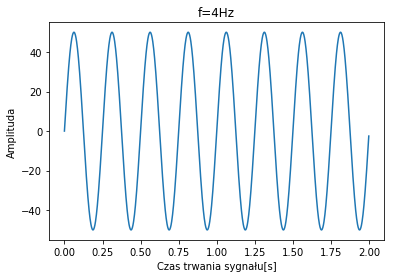

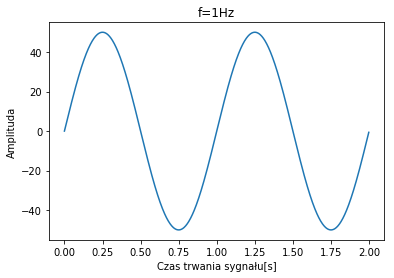

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pyaudio

def SinusoidalSignal(time,frequency,amplitude,phase,sampling):
    duration = time   # in seconds, may be float
    f = frequency     # sine frequency, Hz, may be float
    A = amplitude     # amplitude
    fi = phase        # phase shift
    fs = sampling     # sampling rate
    # generate samples, note conversion to float32 array
    #+fi%*np.pi/180
    return A*(np.sin(2*np.pi*np.arange(fs*duration)*f/fs)+(fi*np.pi/180))
if __name__=="__main__":
    #wykres pierwszej funkcji
    fs = 500
    y1=SinusoidalSignal(2.0,2.0,50,0,fs)
    t1=np.arange(0,2.0,1/fs)
    plt.plot(t1,y1)
    plt.title("Wykresy obrazujące jak na sygnał wpływa zmiana częstotliwości")
    plt.ylabel("Amplituda")
    plt.title("f=2Hz")
    plt.xlabel("Czas trwania sygnału[s]")
    plt.show()
    y2=SinusoidalSignal(2.0,4.0,50,0,fs)
    plt.plot(t1,y2)
    plt.ylabel("Amplituda")
    plt.title("f=4Hz")
    plt.xlabel("Czas trwania sygnału[s]")
    plt.show()
    y3=SinusoidalSignal(2.0,1.0,50,0,fs)
    plt.plot(t1,y3)
    plt.title("f=1Hz")
    plt.ylabel("Amplituda")
    plt.xlabel("Czas trwania sygnału[s]")
    plt.show()

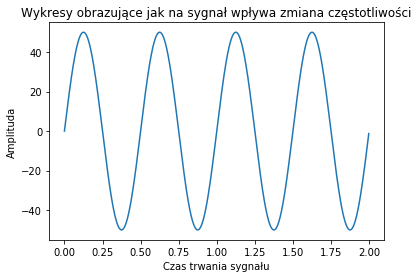

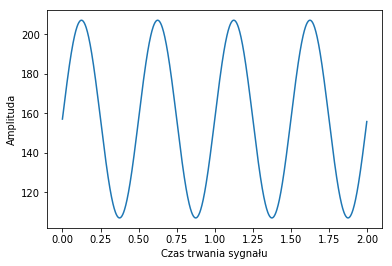

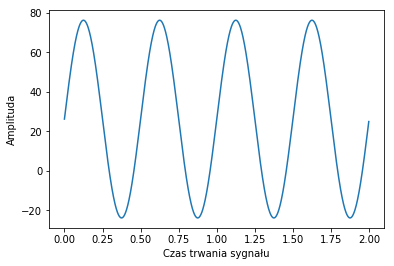

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pyaudio

def SinusoidalSignal(time,frequency,amplitude,phase,sampling):
    duration = time   # in seconds, may be float
    f = frequency     # sine frequency, Hz, may be float
    A = amplitude     # amplitude
    fi = phase        # phase shift
    fs = sampling     # sampling rate
    # generate samples, note conversion to float32 array
    #+fi%*np.pi/180
    return A*(np.sin(2*np.pi*np.arange(fs*duration)*f/fs)+(fi*np.pi/180))

if __name__=="__main__":
    #wykres pierwszej funkcji
    fs = 500
    y1=SinusoidalSignal(2.0,2.0,50,0,fs)
    t1=np.arange(0,2.0,1/fs)
    plt.plot(t1,y1)
    plt.title("Wykresy obrazujące jak na sygnał wpływa zmiana częstotliwości")
    plt.ylabel("Amplituda")
    plt.xlabel("Czas trwania sygnału")
    plt.show()
    y2=SinusoidalSignal(2.0,2.0,50,180,fs)
    plt.plot(t1,y2)
    plt.ylabel("Amplituda")
    plt.xlabel("Czas trwania sygnału")
    plt.show()
    y3=SinusoidalSignal(2.0,2.0,50,30,fs)
    plt.plot(t1,y3)
    plt.ylabel("Amplituda")
    plt.xlabel("Czas trwania sygnału")
    plt.show()

# Zadanie 2.3
Wykorzystując funkcję z poprzedniego zadania, zasymulować próbkowanie sygnału sinusoidalnego o częstotliwości 1kHz, 
zastosować różne wartości tempa próbkowania:

a) fs > 2 × f

b) fs = 2 × f

c) fs < 2 × f

Porównać przebiegi na wykresach (stosując tą samą skalę czasu). W którym z powyższych trzech przypadków warunek Nyquista był spełniony?
Zakładając ustaloną wartość fs, jakie zakresy zmienności parametrów f oraz φ wystarczają do spróbkowania wszystkich możliwych sygnałów o zadanej amplitudzie?

        WARUNEK NYQUISTA SPEŁNIONY DLA 1 PRZYPADKU BOWIEM FS>2*F
        Jeżeli będziemy próbkować 2 razy więcej niż częstotliwość to będziemy ciągle w zerach sinusoidy
       

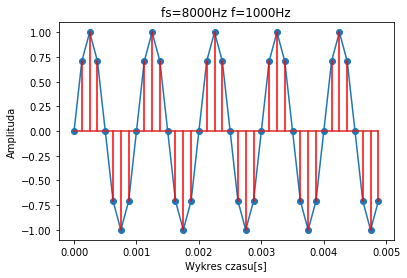

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pyaudio

def SinusoidalSignal(time,frequency,amplitude,sampling):
    duration = time   # in seconds, may be float
    f = frequency     # sine frequency, Hz, may be float
    A = amplitude     # amplitude
    fs = sampling     # sampling rate
    # generate samples, note conversion to float32 array
    #+fi%*np.pi/180
    return A*(np.sin(2*np.pi*np.arange(fs*duration)*f/fs))

if __name__=="__main__":
    p = pyaudio.PyAudio()
    volume = 0.5     # range [0.0, 1.0]
    f=1000
    # sampling rate, Hz, must be integer
    fs1 = 8000
    samples1 = SinusoidalSignal(2.0,f,1,fs1).astype(np.float32)
    
    #wykres pierwszej funkcji
    y1=SinusoidalSignal(5.0*10**-3,f,1,fs1)
    t1=np.arange(0,5.0*10**-3,1/fs1)
    plt.plot(t1,y1,label="Wykres sygnału")
    plt.stem(t1,y1,'r',label="Sample rate")
    plt.xlabel("Wykres czasu[s]")
    plt.ylabel("Amplituda")
    plt.title("fs=8000Hz f=1000Hz")
    plt.show()

    #odsluch pierwszej funkcji
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs1,output=True)
    stream.write(volume*samples1)
    stream.stop_stream()
    stream.close()
    

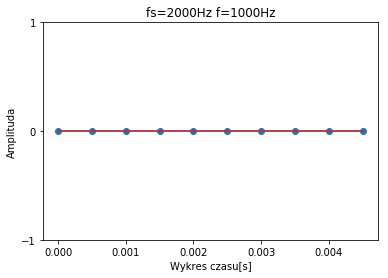

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pyaudio

def SinusoidalSignal(time,frequency,amplitude,sampling):
    duration = time   # in seconds, may be float
    f = frequency     # sine frequency, Hz, may be float
    A = amplitude     # amplitude
    fs = sampling     # sampling rate
    # generate samples, note conversion to float32 array
    #+fi%*np.pi/180
    return A*(np.sin(2*np.pi*np.arange(fs*duration)*f/fs))



if __name__=="__main__":
    p = pyaudio.PyAudio()
    volume = 0.5     # range [0.0, 1.0]
    f=1000
    # sampling rate, Hz, must be integer
    fs2 = 2000
    samples2 = SinusoidalSignal(2.0,f,50,0).astype(np.float32) 
        
    #wykres drugiej funkcji
    y2=SinusoidalSignal(5.0*10**-3,f,1,fs2)
    t2=np.arange(0,5.0*10**-3,1/fs2)
    plt.plot(t2,y2,label="Wykres sygnału")
    plt.stem(t2,y2,'r',label="Sample rate")
    plt.xlabel("Wykres czasu[s]")
    plt.ylabel("Amplituda")
    plt.yticks((-1,0,1))
    plt.title("fs=2000Hz f=1000Hz")
    plt.show()

    #odsluch drugiej funkcji
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs2,output=True)
    stream.write(volume*samples2)
    stream.stop_stream()
    stream.close()
    
    

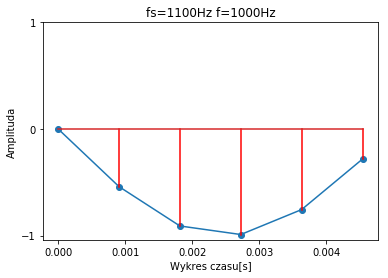

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pyaudio

def SinusoidalSignal(time,frequency,amplitude,sampling):
    duration = time   # in seconds, may be float
    f = frequency     # sine frequency, Hz, may be float
    A = amplitude     # amplitude
    fs = sampling     # sampling rate
    # generate samples, note conversion to float32 array
    #+fi%*np.pi/180
    return A*(np.sin(2*np.pi*np.arange(fs*duration)*f/fs))

if __name__=="__main__":
    p = pyaudio.PyAudio()
    volume = 0.5     # range [0.0, 1.0]
    f=1000
    # sampling rate, Hz, must be integer
    fs3 = 1100
    #samples3 = SinusoidalSignal(2.0,f,50,0,fs3).astype(np.float32)

    y3=SinusoidalSignal(5.0*10**-3,f,1,fs3)
    t3=np.arange(0,5.0*10**-3,1/fs3)
    plt.plot(t3,y3,label="Wykres sygnału")
    plt.stem(t3,y3,'r',label="Sample rate")
    plt.xlabel("Wykres czasu[s]")
    plt.ylabel("Amplituda")
    plt.yticks((-1,0,1))
    plt.title("fs=1100Hz f=1000Hz")
    plt.show()
    
    #odsluch trzeciej funkcji
    stream3 = p.open(format=pyaudio.paFloat32,channels=1,rate=fs3,output=True)
    stream3.write(volume*samples3)
    stream3.stop_stream()
    stream3.close()
    p.terminate()
    
    
    

# Zadanie 2.4
Wykorzystując mikrofon oraz dowolną aplikację do rejestracji dźwięków (np. Audacity, Rejestrator Windows, etc...)

zarejestrować krótką wypowiedź np. odliczanie do trzech. Zarejestrowany sygnał zapisać do pliku wav.

Otworzyć plik w środowisku Matlab (patrz funkcja audioread).

Dokonać superpozycji sygnału mowy z sygnałem szumu gaussowskiego ( μ= 0, σ2 = 1).

Uwaga – przed zsumowaniem sygnałów, przemnożyć sygnał szumu przez odpowiedni współczynnik tak,

aby iloraz sygnał-szum (SNR) = 3dB. Sporządzić wykresy czasowe sygnału oryginalnego i zakłóconego.

Iloraz sygnal-szum wynosi: 3.0867501184856803


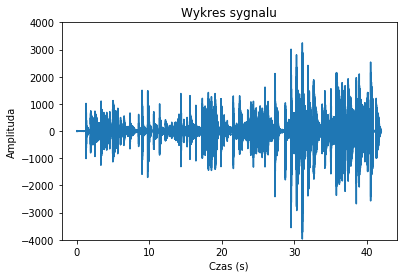

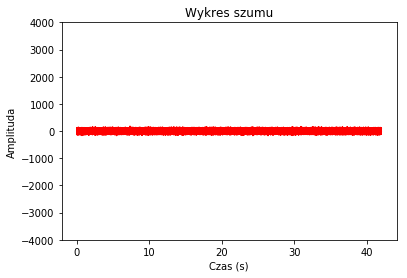

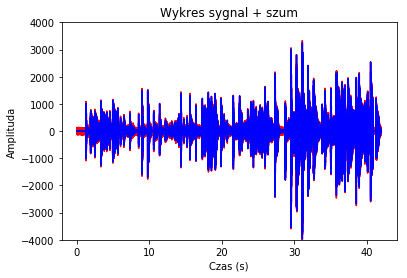

In [140]:
import wave
from scipy.io.wavfile import read
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

# read audio samples
fs = read('test.wav')[0]
signal = read('test.wav')[1]
t=np.arange(0,len(signal)/fs,1/fs)
k=35 #Wspolczynik
noise = k*np.random.normal(size=len(signal[:,0]),loc=0,scale=1)
rmssignal=np.sqrt(np.mean(np.square(signal[:,0])))
rmsnoise=np.sqrt(np.mean(np.square(noise)))
db=20 * np.log10(rmssignal/rmsnoise)
print('Iloraz sygnal-szum wynosi: '+str(db))
plt.plot(t, signal[:,0]);
plt.xlabel('Czas (s)');
plt.title("Wykres sygnalu")
plt.ylabel("Amplituda")
plt.ylim(-4000,4000)
plt.show()
plt.ylim(-4000,4000)
plt.title("Wykres szumu")
plt.xlabel('Czas (s)');
plt.ylabel("Amplituda")
plt.plot(t,noise,'r');
plt.show()
plt.ylabel("Amplituda")
plt.title("Wykres sygnal + szum")
plt.plot(t, signal[:,0]+noise,'r',t, signal[:,0],'b');
plt.xlabel('Czas (s)');
plt.ylim(-4000,4000)
plt.show()
write('testzszumem.wav',fs,signal[:,0]+noise)

In [13]:
wf = wave.open('test.wav', 'rb')
p = pyaudio.PyAudio()
chunk = 1024
# open stream based on the wave object which has been input.
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),channels=wf.getnchannels(),rate=wf.getframerate(),output=True)
data = wf.readframes(chunk)
# play stream (looping from beginning of file to the end)
while data != '':
    # writing to the stream is what *actually* plays the sound.
    stream.write(data)
    data = wf.readframes(chunk)
    # cleanup stuff.
stream.close()
p.terminate() 

KeyboardInterrupt: 

# Zadania z Pracowni Specjalistycznej
